In [1]:
from utils import DQN, ReplayBuffer, greedy_action, epsilon_greedy, update_target, loss, loss2, loss3

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import math
import numpy as np

import gym
import matplotlib.pyplot as plt

In [ ]:
NUM_RUNS = 10

A = 50 # neuron pero layer
B = 3 # n layers
C = 0.1 # lr
D = 150000 # memory size
E = 120 # n episodes
F = 0.1 # epsilon
G = 1 # reward normalisation
H = 64 # memory sample
I = 4 # main network update frequency

In [ ]:
runs_results = []

env = gym.make('CartPole-v1')
for run in range(NUM_RUNS):
    print(f"Starting run {run+1} of {NUM_RUNS}")
    layers = [4] + [A]*B + [2]
    policy_net = DQN(layers)
    target_net = DQN(layers)
    update_target(target_net, policy_net)
    target_net.eval()

    #optimizer = optim.SGD(policy_net.parameters(), lr=C)
    optimizer = optim.Adam(policy_net.parameters(), lr=C) # Adam better
    memory = ReplayBuffer(D)

    steps_done = 0

    episode_durations = []

    for i_episode in range(E):
        if (i_episode+1) % 10 == 0:
            print("episode ", i_episode+1, "/", E)

        observation, info = env.reset()
        state = torch.tensor(observation).float()

        done = False
        terminated = False
        t = 0
        while not (done or terminated):

            # Select and perform an action
            action = epsilon_greedy(F, policy_net, state)

            observation, reward, done, terminated, info = env.step(action)
            reward = torch.tensor([reward])/G
            action = torch.tensor([action])
            next_state = torch.tensor(observation).reshape(-1).float()

            memory.push([state, action, next_state, reward, torch.tensor([done])])

            # Move to the next state
            state = next_state

            # Perform one step of the optimization (on the policy network)
            if not len(memory.buffer) < H:
                transitions = memory.sample(H)
                state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                # Compute loss
                mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                # Optimize the model
                optimizer.zero_grad()
                mse_loss.backward()
                optimizer.step()
            
            if done or terminated:
                episode_durations.append(t + 1)
            t += 1  
            steps_done += 1
            # Update the target network, copying all weights and biases in DQN
            if steps_done % I == 0: 
                update_target(target_net, policy_net)
    runs_results.append(episode_durations)
print('Complete')

Starting run 1 of 10
episode  10 / 120
episode  20 / 120
episode  30 / 120
episode  40 / 120
episode  50 / 120
episode  60 / 120
episode  70 / 120
episode  80 / 120
episode  90 / 120
episode  100 / 120
episode  110 / 120
episode  120 / 120
Starting run 2 of 10
episode  10 / 120
episode  20 / 120
episode  30 / 120
episode  40 / 120
episode  50 / 120
episode  60 / 120
episode  70 / 120
episode  80 / 120
episode  90 / 120
episode  100 / 120
episode  110 / 120
episode  120 / 120
Starting run 3 of 10
episode  10 / 120
episode  20 / 120
episode  30 / 120
episode  40 / 120
episode  50 / 120
episode  60 / 120
episode  70 / 120
episode  80 / 120
episode  90 / 120
episode  100 / 120
episode  110 / 120
episode  120 / 120
Starting run 4 of 10
episode  10 / 120
episode  20 / 120
episode  30 / 120
episode  40 / 120
episode  50 / 120
episode  60 / 120
episode  70 / 120
episode  80 / 120
episode  90 / 120
episode  100 / 120
episode  110 / 120
episode  120 / 120
Starting run 5 of 10
episode  10 / 120
e

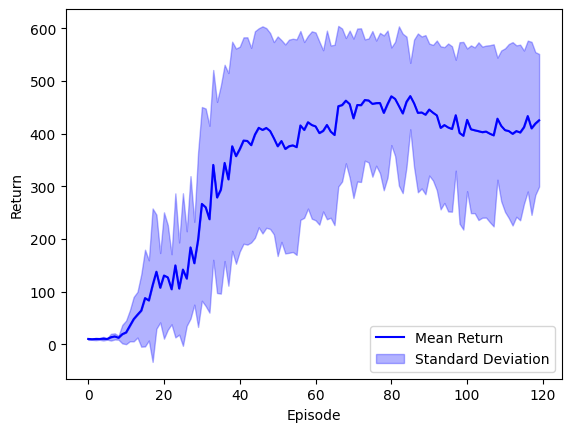

In [7]:
# Plotting the learning curve
# Placeholder plot, you are free to modify it

num_episodes = len(runs_results[0])
 
results = torch.tensor(runs_results)
means = results.float().mean(0)
stds = results.float().std(0)

plt.plot(torch.arange(num_episodes), means, label='Mean Return', color='b')
plt.fill_between(np.arange(num_episodes), means, means + stds, alpha=0.3, color='b', label='Standard Deviation')
plt.fill_between(np.arange(num_episodes), means, means - stds, alpha=0.3, color='b')

# Labels and legend
plt.ylabel("Return")
plt.xlabel("Episode")
plt.legend()  # Adds the legend
plt.show()

In [ ]:
observations = [] # keep observations to get the range of angle and omega
runs_results = []
env = gym.make('CartPole-v1')
for run in range(1):
    print(f"Starting run {run+1} of {NUM_RUNS}")
    layers = [4] + [A]*B + [2]
    policy_net = DQN(layers)
    target_net = DQN(layers)
    update_target(target_net, policy_net)
    target_net.eval()

    #optimizer = optim.SGD(policy_net.parameters(), lr=C) # bad
    optimizer = optim.Adam(policy_net.parameters(), lr=0.1)
    memory = ReplayBuffer(D)

    steps_done = 0

    episode_durations = []

    for i_episode in range(120):
        if (i_episode+1) % 10 == 0:
            print("episode ", i_episode+1, "/", 120)

        observation, info = env.reset()
        state = torch.tensor(observation).float()

        done = False
        terminated = False
        t = 0
        while not (done or terminated):

            # Select and perform an action
            action = epsilon_greedy(F, policy_net, state)

            observation, reward, done, terminated, info = env.step(action)
            observations.append(observation)
            reward = torch.tensor([reward])/G
            action = torch.tensor([action])
            next_state = torch.tensor(observation).reshape(-1).float()

            memory.push([state, action, next_state, reward, torch.tensor([done])])

            # Move to the next state
            state = next_state

            # Perform one step of the optimization (on the policy network)
            if not len(memory.buffer) < H:
                transitions = memory.sample(H)
                state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                # Compute loss
                mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                # Optimize the model
                optimizer.zero_grad()
                mse_loss.backward()
                optimizer.step()
            
            if done or terminated:
                episode_durations.append(t + 1)
            t += 1  
            steps_done += 1
            # Update the target network, copying all weights and biases in DQN
            if steps_done % I == 0: 
                update_target(target_net, policy_net)
    runs_results.append(episode_durations)
print('Complete')

Starting run 1 of 10
episode  10 / 120
episode  20 / 120
episode  30 / 120
episode  40 / 120
episode  50 / 120
episode  60 / 120
episode  70 / 120
episode  80 / 120
episode  90 / 120
episode  100 / 120
episode  110 / 120
episode  120 / 120
Complete


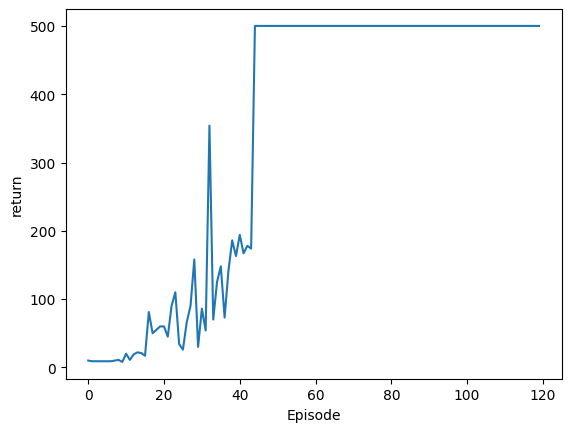

In [69]:
# Plotting the learning curve
# Placeholder plot, you are free to modify it

num_episodes = len(runs_results[0])
 
results = torch.tensor(runs_results).squeeze()
#means = results.float().mean(0)
#stds = results.float().std(0)

plt.plot(torch.arange(num_episodes), results)
plt.ylabel("return")
plt.xlabel("Episode")
#plt.fill_between(np.arange(num_episodes), means, means+stds, alpha=0.3, color='b')
#plt.fill_between(np.arange(num_episodes), means, means-stds, alpha=0.3, color='b')
plt.show()

In [70]:
observations = np.array([observations])

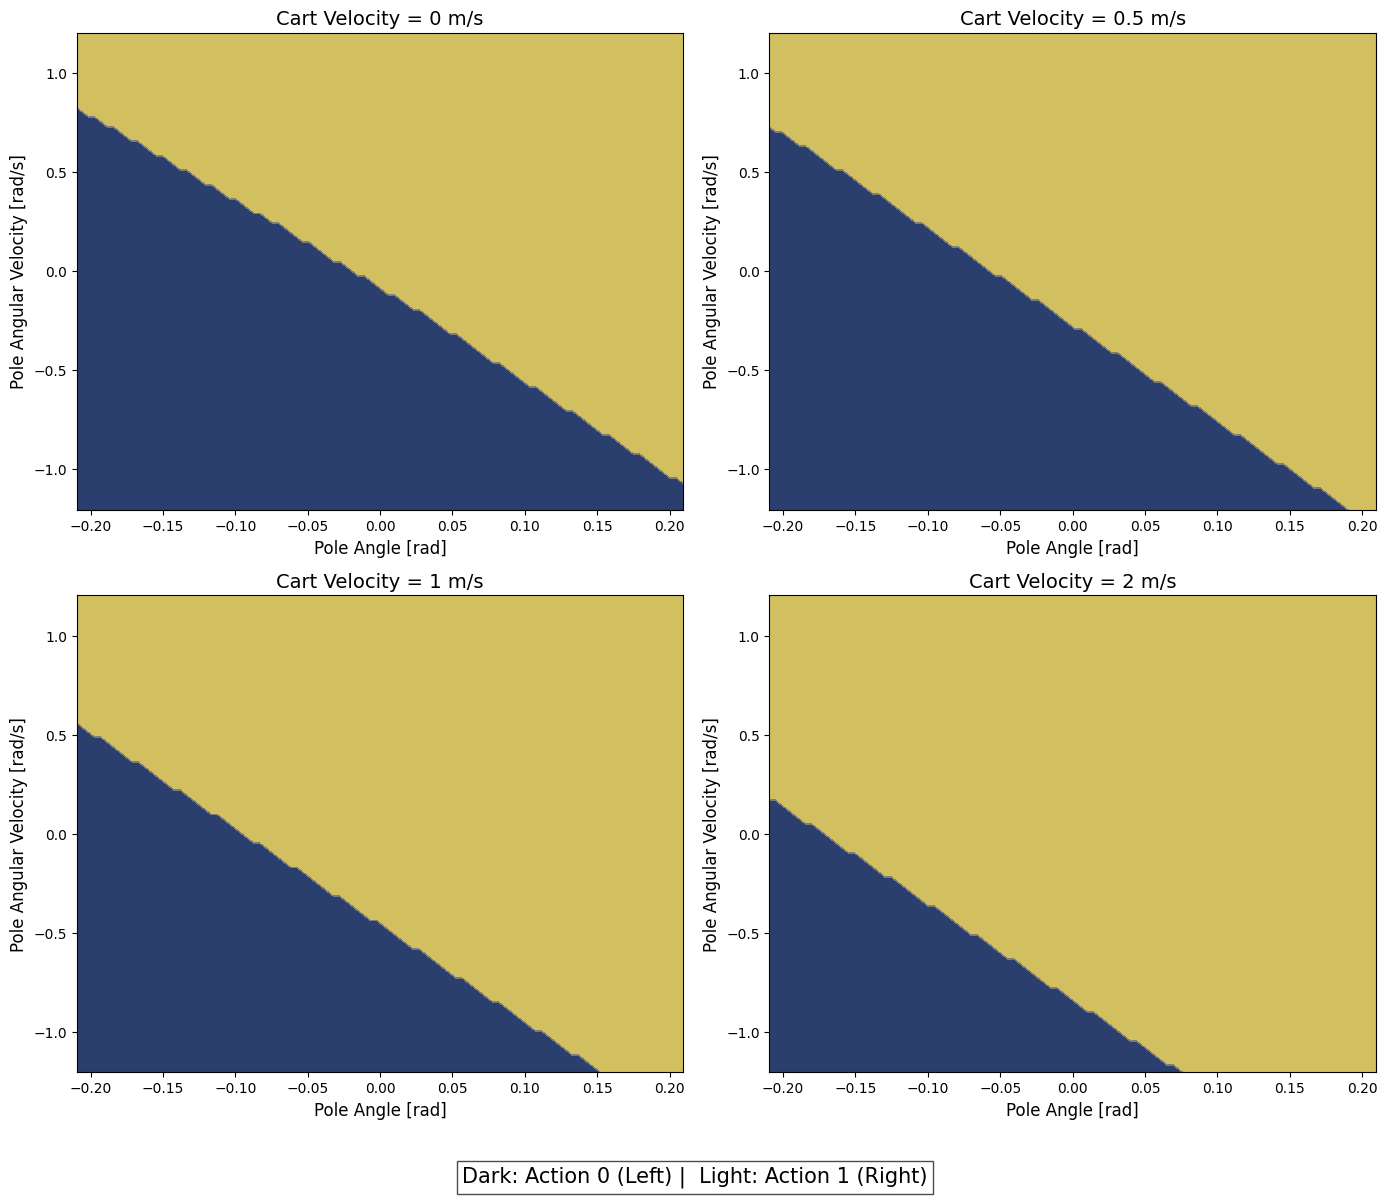

In [ ]:
angle_range = 0.2094
omega_range = np.max(observations[:, 3]) # pole angular velocity is third state

angle_samples = 100
omega_samples = 100
angles = torch.linspace(angle_range, -angle_range, angle_samples)
omegas = torch.linspace(-omega_range, omega_range, omega_samples)
velocities = [0, 0.5, 1, 2]

greedy_q_array = torch.zeros((angle_samples, omega_samples))
policy_array = torch.zeros((angle_samples, omega_samples))

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

for v, ax in enumerate(axs.flat):
    velocity = velocities[v]
    for i, angle in enumerate(angles):
        for j, omega in enumerate(omegas):
            state = torch.tensor([0.0, velocity, angle.item(), omega.item()], dtype=torch.float32)
            with torch.no_grad():
                q_vals = policy_net(state)
                greedy_action = q_vals.argmax()
                policy_array[i, j] = greedy_action

    c = ax.contourf(
        angles.numpy(), omegas.numpy(), policy_array.T.numpy(),
        cmap='cividis', levels=2
    )

    ax.set_title(f"Cart Velocity = {velocity} m/s", fontsize=14)

    ax.set_xlabel("Pole Angle [rad]", fontsize=12)
    ax.set_ylabel("Pole Angular Velocity [rad/s]", fontsize=12)

    ax.set_xlim([angles.min(), angles.max()])
    ax.set_ylim([omegas.min(), omegas.max()])

fig.text(
    0.5, 0.01,
    "Dark: Action 0 (Left) |  Light: Action 1 (Right)",
    ha='center', fontsize=15, bbox=dict(facecolor='white', alpha=0.7)
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("policy.png", dpi=600) 
plt.show()



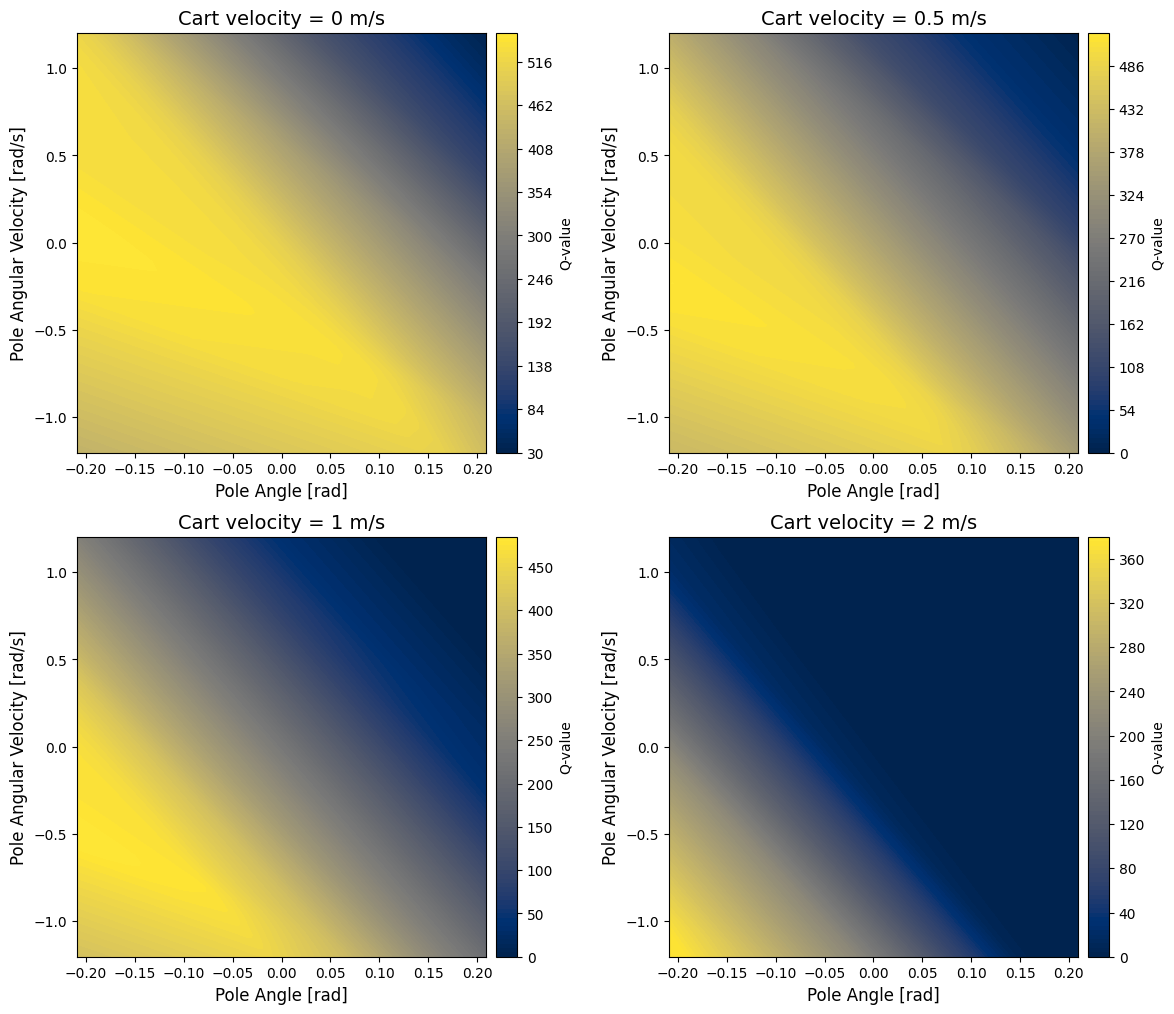

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
for v, ax in enumerate(axs.flat):
    velocity = velocities[v]
    for i, angle in enumerate(angles):
        for j, omega in enumerate(omegas):
            state = torch.tensor([0., velocity, angle, omega])
            with torch.no_grad():
                    q_vals = policy_net(state)
                    greedy_action = q_vals.argmax()
                    greedy_q_array[i, j] = q_vals[greedy_action]

    greedy_q_array /= 1e10 # Q-values normalisation
    c = ax.contourf(
        angles.numpy(), omegas.numpy(), greedy_q_array.T.numpy(),
        cmap='cividis', levels=100
    )
    ax.set_title(f"Cart velocity = {velocity} m/s", fontsize=14)
    
    cbar = fig.colorbar(c, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label("Q-value")

    ax.set_xlabel("Pole Angle [rad]", fontsize=12)
    ax.set_ylabel("Pole Angular Velocity [rad/s]", fontsize=12)

    ax.set_xlim([angles.min(), angles.max()])
    ax.set_ylim([omegas.min(), omegas.max()])


plt.savefig("qvalues.png", dpi=600)
plt.show()
    